<a href="https://colab.research.google.com/github/Nikhilam07/PRODIGY_ML_02/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Show basic info
print("Shape:", data.shape)
data.head()


Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Using two features Annual Income and Spending Score

In [3]:
# Select relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


Elbow Method to Choose k

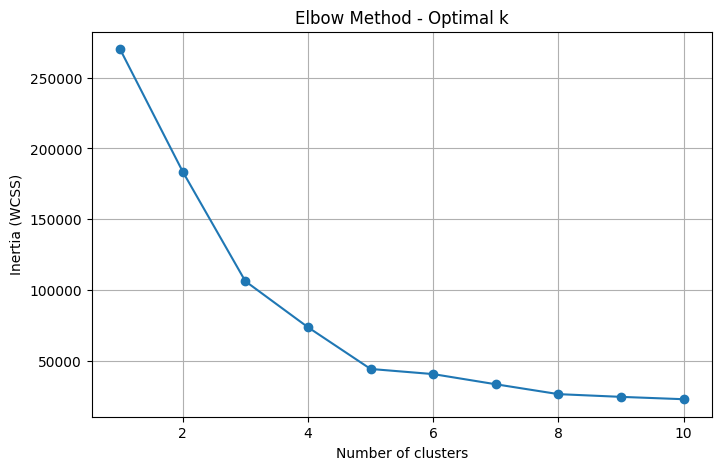

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()


In [5]:
# Apply KMeans with chosen k (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)


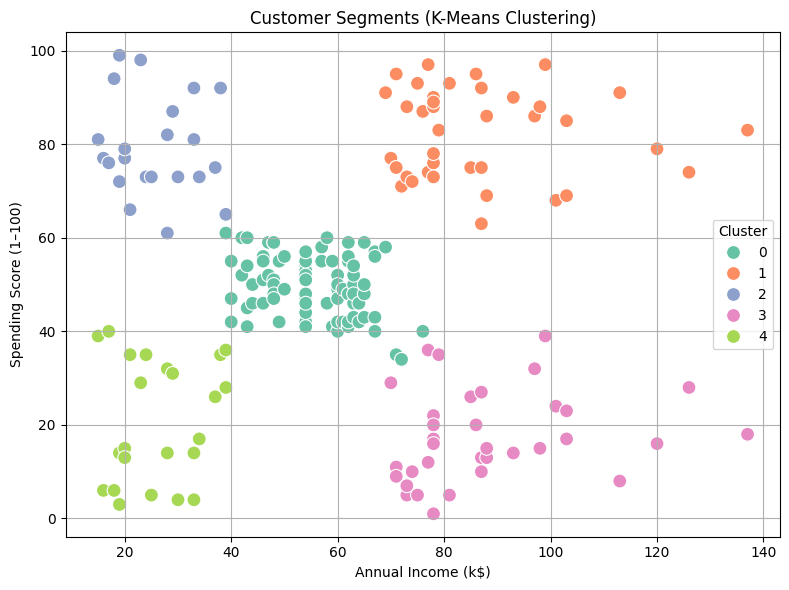

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Using three features Age, Annual Income, and Spending Score to better understand

Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [20]:
# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')
print("Dataset loaded. Shape:", data.shape)


Dataset loaded. Shape: (200, 5)


Select Features for Clustering

In [21]:
# Select relevant features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]


Standardize the Features

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Elbow Method to Find Optimal k

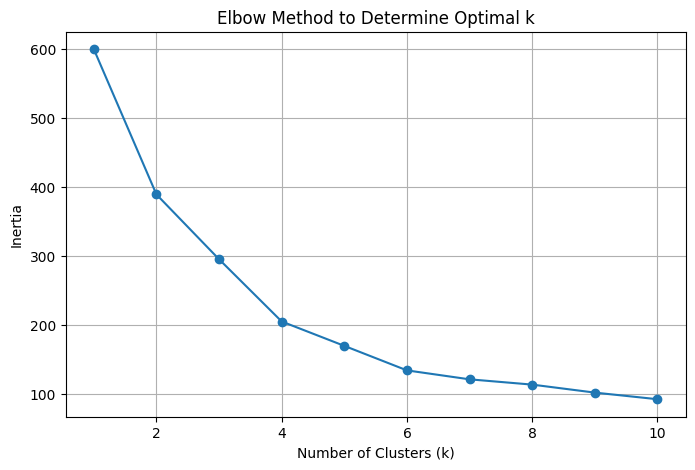

In [23]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Apply KMeans Clustering

In [29]:
# Choose k based on elbow method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


Visualize Clusters

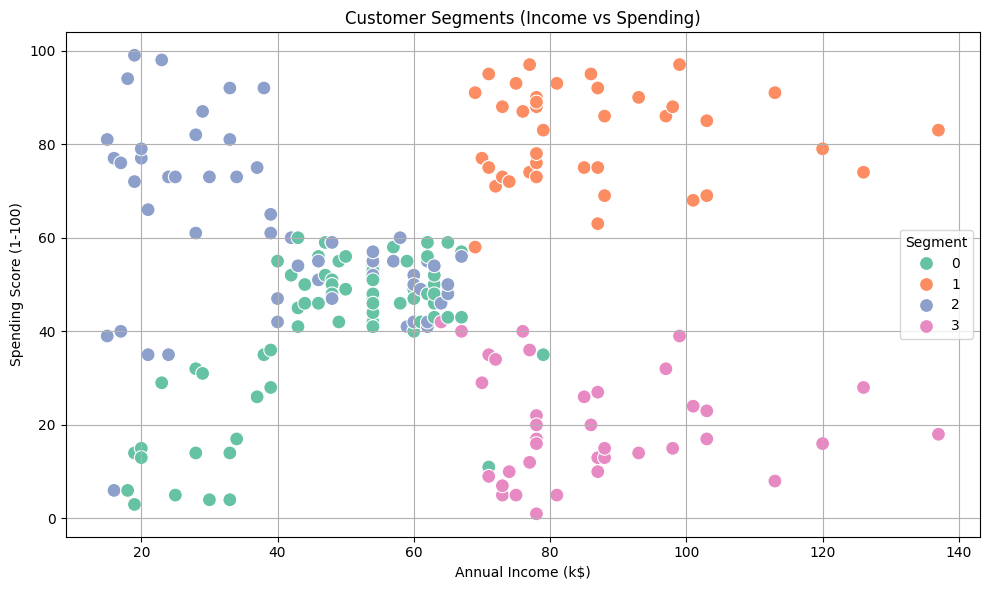

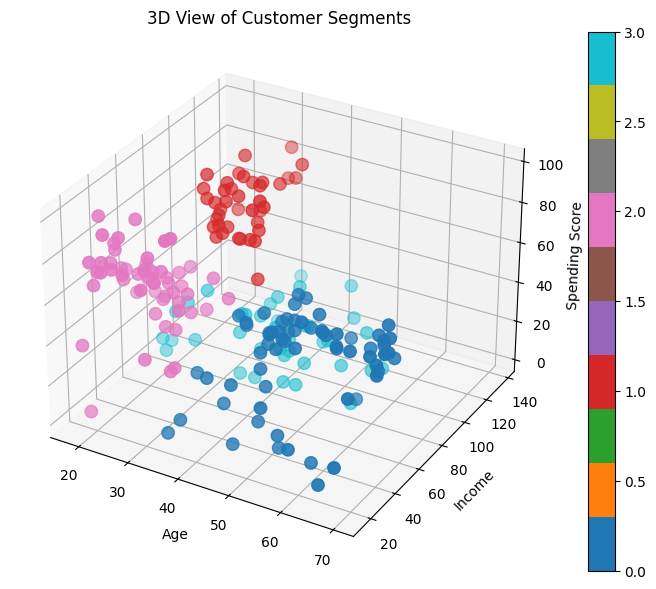

In [31]:
# 2D plot: Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (Income vs Spending)')
plt.legend(title='Segment')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional 3D Plot (Age, Income, Score)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'],
                c=data['Cluster'], cmap='tab10', s=80)
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D View of Customer Segments')
plt.colorbar(sc)
plt.show()